Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [19]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [56]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [57]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [58]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [60]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)



['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Found 2239 files belonging to 9 classes.


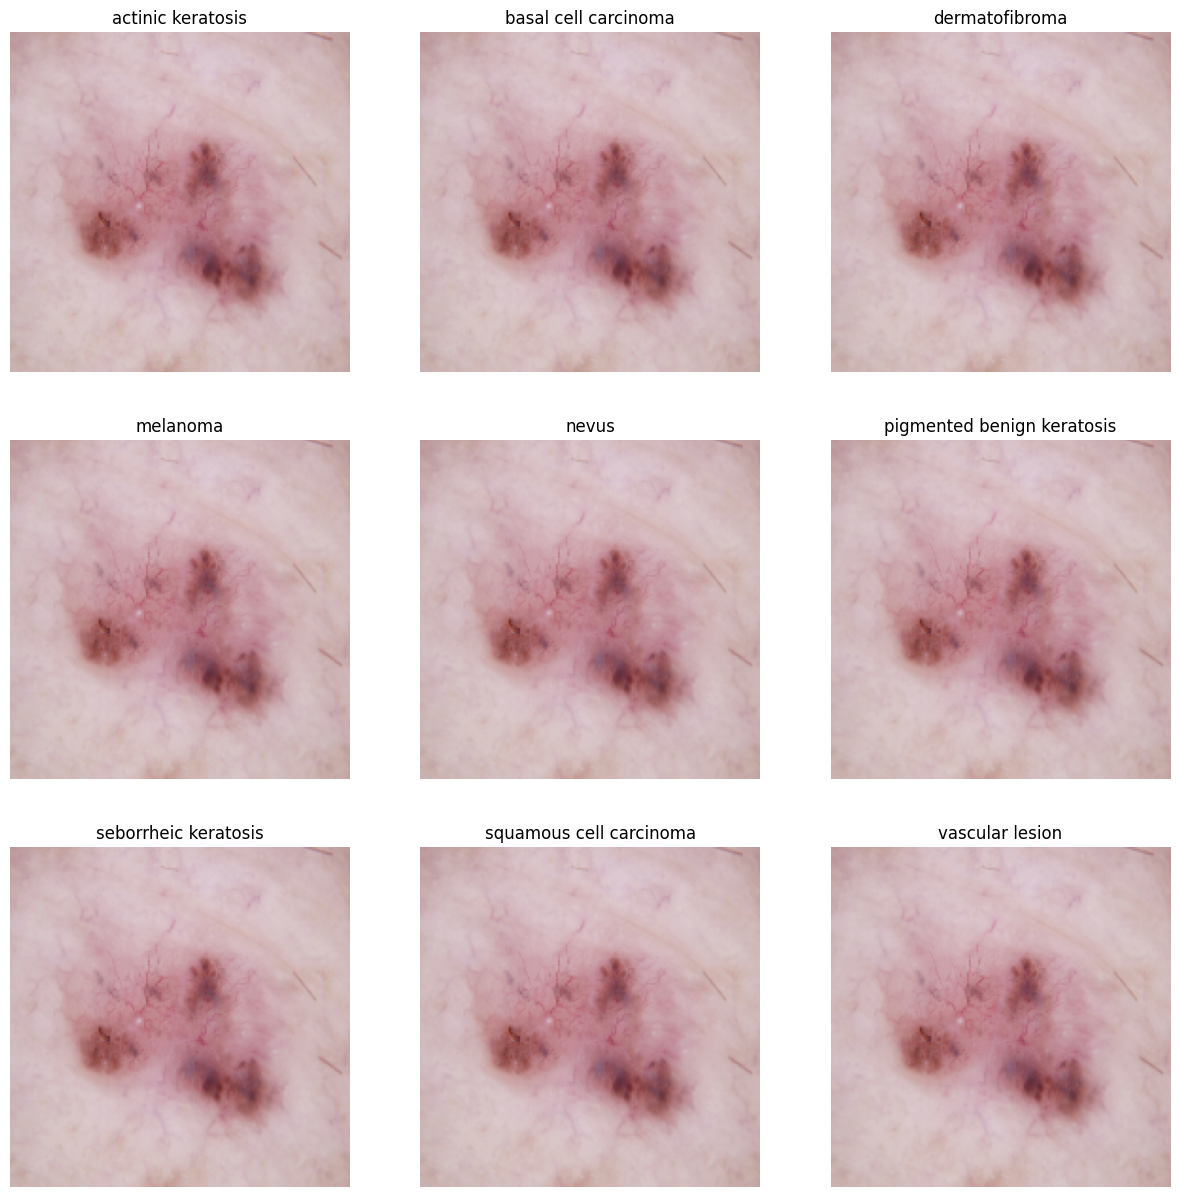

In [61]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [62]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling, BatchNormalization, Activation, Dropout
preprocessing_layers = [
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3))
]
### Your code goes here
#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [64]:
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Use the .keras extension
    monitor='val_accuracy',       # Metric to monitor
    save_best_only=True,          # Save only the best model
    verbose=1
)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [65]:
# View the summary of all layers
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [66]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1991 - loss: 2.2810
Epoch 1: val_accuracy improved from -inf to 0.38031, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.1996 - loss: 2.2777 - val_accuracy: 0.3803 - val_loss: 1.8465
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3075 - loss: 1.8676
Epoch 2: val_accuracy improved from 0.38031 to 0.45414, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.3077 - loss: 1.8671 - val_accuracy: 0.4541 - val_loss: 1.6790
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3920 - loss: 1.7102
Epoch 3: val_accuracy did not improve from 0.45414
56/56 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.3922 - loss: 1.7096 - val_accuracy: 0.4183 - val_loss: 1.6306
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4081 - loss: 1.6214
Epoch 4: val_accuracy did not improve from 0.45414
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - a

### Visualizing training results

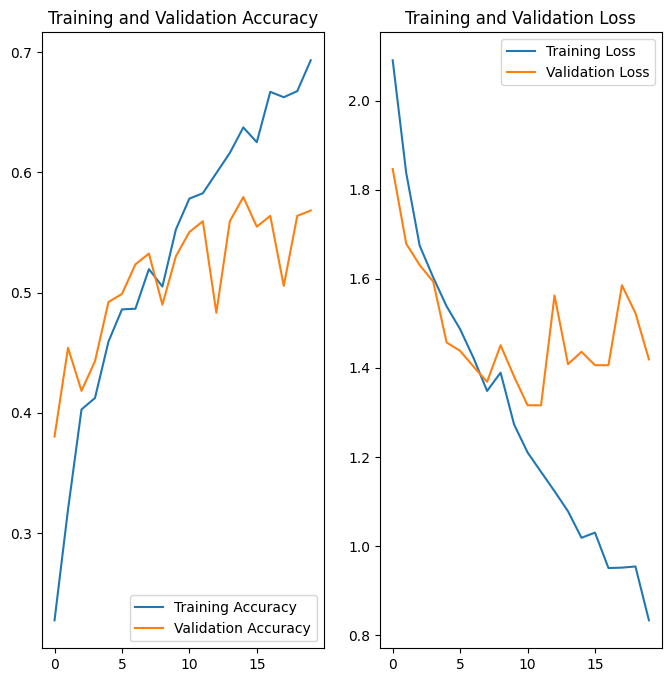

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Training and Validation Accuracy:

    Accuracy Plot (Left):

    Training accuracy shows a consistent upward trend, reaching a value above
    0.7.
    Validation accuracy also improves but exhibits more fluctuations and doesn't consistently match the training accuracy.

    Loss Plot (Right):

    Training loss decreases steadily over epochs, indicating the model is learning well on the training data.
    Validation loss decreases initially but fluctuates significantly after a few epochs and doesn't closely follow the training loss curve.

    Findings:
    Model Overfitting:

    There is some evidence of overfitting, as the gap between training and validation accuracy widens over epochs.
    Validation loss fluctuations and the growing gap between training and validation metrics indicate the model might be memorizing the training data rather than generalizing well.
  

Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [68]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,nevus,357
1,basal cell carcinoma,376
2,actinic keratosis,114
3,pigmented benign keratosis,462
4,seborrheic keratosis,77
5,melanoma,438
6,dermatofibroma,95
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

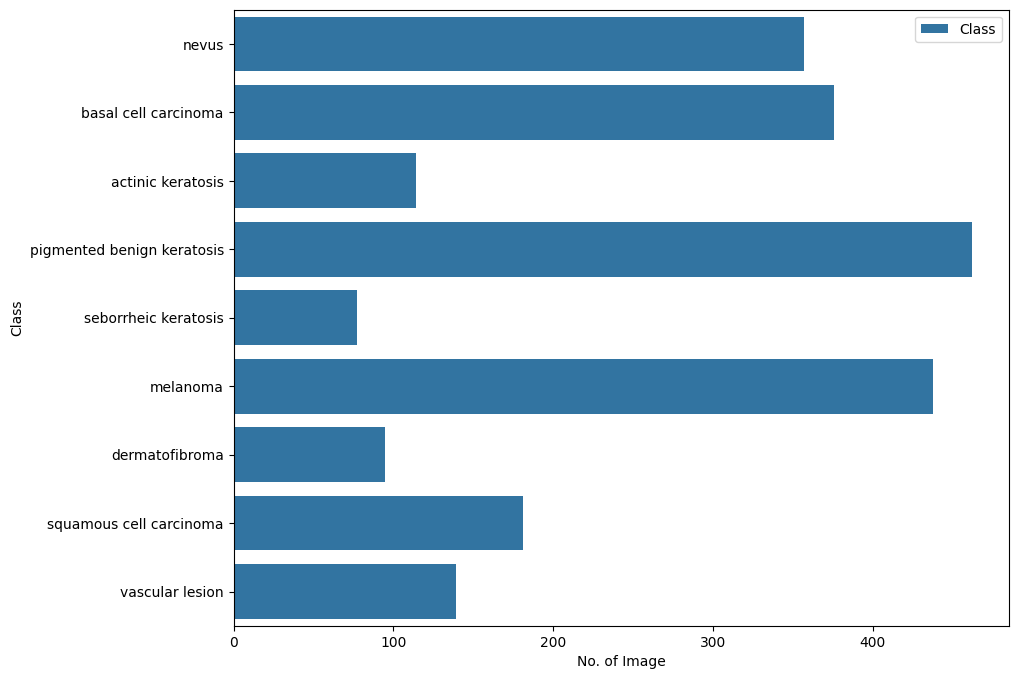

In [69]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

Based on the visualisation in bar chart, here are the findings:
1. Class with the Least Number of Samples:

    Seborrheic keratosis has the least number of samples, as indicated by its shortest bar.

2. Dominant Classes in Terms of Proportion:

    Nevus, Pigmented Benign Keratosis, and Melanoma dominate the dataset, as their bars are the longest, indicating a significantly higher number of samples compared to other classes.

    Observations:

    The imbalance in the dataset (few samples for some classes like seborrheic keratosis and dermatofibroma) can lead to challenges during training, such as poor generalization for underrepresented classes.
    The dominant classes may bias the model toward predicting them more often, which can be mitigated using techniques like data augmentation, oversampling, or class weighting.

Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples

In [70]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [74]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
path_to_training_dataset='/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D7BFE2E7760>: 100%|██████████| 500/500 [00:27<00:00, 18.51 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D7C088FFF70>: 100%|██████████| 500/500 [00:29<00:00, 17.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D7C08FDE5C0>: 100%|██████████| 500/500 [00:29<00:00, 17.02 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D7C0A399DB0>: 100%|██████████| 500/500 [01:53<00:00,  4.39 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7D7C1ACD6650>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D7C0A3B08E0>: 100%|██████████| 500/500 [00:26<00:00, 18.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D7C1ACD4C40>: 100%|██████████| 500/500 [00:53<00:00,  9.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D7BF0D1ED70>: 100%|██████████| 500/500 [00:28<00:00, 17.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D7C0A479A20>: 100%|██████████| 500/500 [00:27<00:00, 18.43 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [79]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [84]:
import glob
import os

path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
print(path_list)

['/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0024511.jpg_83d92167-4071-4a81-bd40-22cb8ecf4c65.jpg', '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000512.jpg_fee68766-50c7-4975-b55f-f0402457e958.jpg', '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000065.jpg_7538900f-f686-48b6-a576-03cc2db39888.jpg', '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027447.jpg_32149d1f-7b36-43c7-aa8b-66d14cd0d22b.jpg', '/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0029460.jpg_1fa6c460-b566-498c-8836-c3c7a381e119.jpg', '/content/gdri

In [86]:
import glob
import os

lesion_list_new = [
    os.path.basename(os.path.dirname(os.path.dirname(y)))  # Extracting the parent directory name
    for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))  # Use glob.glob
]

print(lesion_list_new)

['nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 

In [88]:
path_list_new = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [91]:
# Initialize an empty DataFrame or with your initial data
original_df = pd.DataFrame(columns=['Path', 'Label'])

# Append df2 to the original_df
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)
new_df.head()

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Skin c...,nevus
1,/content/gdrive/MyDrive/Colab Notebooks/Skin c...,nevus
2,/content/gdrive/MyDrive/Colab Notebooks/Skin c...,nevus
3,/content/gdrive/MyDrive/Colab Notebooks/Skin c...,nevus
4,/content/gdrive/MyDrive/Colab Notebooks/Skin c...,nevus


In [92]:
new_df['Label'].value_counts()

,count
Label,
nevus,500
basal cell carcinoma,500
actinic keratosis,500
pigmented benign keratosis,500
seborrheic keratosis,500
melanoma,500
dermatofibroma,500
squamous cell carcinoma,500
vascular lesion,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [93]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [102]:
data_dir_train='/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [103]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [104]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [106]:
#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [108]:
from tensorflow.keras.optimizers import Adam
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("best_model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#### **Todo:**  Train your model

In [109]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2122 - loss: 2.1356
Epoch 1: val_accuracy improved from -inf to 0.40683, saving model to best_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.2127 - loss: 2.1342 - val_accuracy: 0.4068 - val_loss: 1.5518
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4386 - loss: 1.4940
Epoch 2: val_accuracy improved from 0.40683 to 0.50260, saving model to best_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.4387 - loss: 1.4940 - val_accuracy: 0.5026 - val_loss: 1.3692
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4970 - loss: 1.3428
Epoch 3: val_accuracy improved from 0.50260 to 0.52561, saving model to best_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.4971 - loss: 1.3426 - val_accuracy: 0.5256 - val_loss: 1.2386
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5386 - loss: 1.2625
Epoch 4: val_accuracy improved from 0.5256

In [111]:
model.save('model_after_20_epochs.keras')

In [112]:
from tensorflow.keras.models import load_model
model = load_model('model_after_20_epochs.keras')

In [113]:
# Set the total number of epochs to train and the starting epoch
additional_epochs = 30  # Total epochs to train, including previous ones
initial_epoch = 20      # Start training from the 20th epoch

# Continue training the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=additional_epochs,      # Total epochs to train
    initial_epoch=initial_epoch,   # Start from where you left off
    callbacks=[checkpoint, earlystop]
)

Epoch 21/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8929 - loss: 0.2847
Epoch 21: val_accuracy did not improve from 0.83073
169/169 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.8929 - loss: 0.2847 - val_accuracy: 0.8203 - val_loss: 0.6890
Epoch 22/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8909 - loss: 0.2801
Epoch 22: val_accuracy improved from 0.83073 to 0.83890, saving model to best_model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.8910 - loss: 0.2801 - val_accuracy: 0.8389 - val_loss: 0.6065
Epoch 23/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9041 - loss: 0.2546
Epoch 23: val_accuracy did not improve from 0.83890
169/169 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9041 - loss: 0.2546 - val_accuracy: 0.7030 - val_loss: 1.2748
Epoch 24/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8830 - loss: 0.3166
Epoch 24: val_accuracy improved from 0.83890 to 0.84336, saving model to best_model.keras
169/169 ━━━━━━━━━━

#### **Todo:**  Visualize the model results

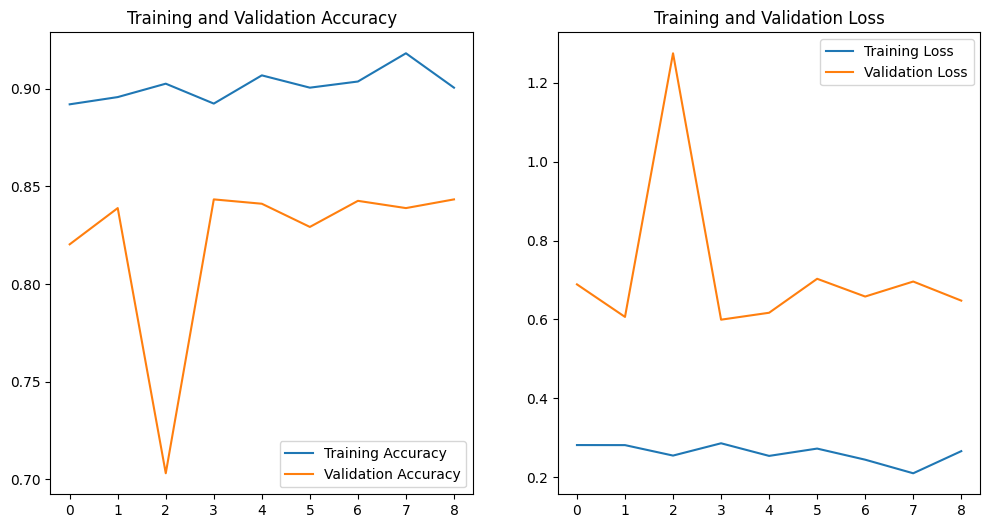

In [115]:
# Combine previous history with the new one if applicable
# Assuming `previous_history` contains the metrics from the first 20 epochs

if 'previous_history' in locals():
    acc = previous_history['accuracy'] + history.history['accuracy']
    val_acc = previous_history['val_accuracy'] + history.history['val_accuracy']
    loss = previous_history['loss'] + history.history['loss']
    val_loss = previous_history['val_loss'] + history.history['val_loss']
else:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

# Determine the total range of epochs
total_epochs = len(acc)  # Length of the combined accuracy list
epochs_range = range(total_epochs)

# Plot the metrics
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



    Observations:

    Training and Validation Accuracy:
    The training accuracy remains consistently high (above 90%).
    The validation accuracy shows significant improvement compared to the first model. Although it fluctuates slightly, it stabilizes at a much higher level (around 85%–87%), indicating better generalization.

    Training and Validation Loss:
    The training loss is low and consistent, showing that the model fits the training data well.
    The validation loss is much more stable compared to the initial model and remains relatively low, indicating reduced overfitting.

    Class Rebalancing Impact:
    The improved validation metrics suggest that class rebalancing has helped the model generalize better by addressing class imbalance issues. This ensures the model does not overly favor dominant classes.

    Analysis:

    Underfitting: The model no longer shows signs of underfitting. The high training accuracy and low training loss indicate the model is learning the patterns in the training data effectively.
    Overfitting: The validation loss and accuracy are close to the training metrics, showing that overfitting has been significantly reduced. The use of data augmentation and rebalancing likely played a major role in this improvement.